# Acute Inflammations Dataset - UCI

Analysis of the UCI dataset https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.

In [1]:
import numpy as np
import pandas as pd
%pylab inline
pylab.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_df = pd.read_csv('diagnosis.csv', sep='\t', decimal=',', header=None)

In [3]:
data_df.head()

,0,1,2,3,4,5,6,7
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


# Attribute Information

    a1 Temperature of patient { 35C-42C }
    a2 Occurrence of nausea { yes, no }
    a3 Lumbar pain { yes, no }
    a4 Urine pushing (continuous need for urination) { yes, no }
    a5 Micturition pains { yes, no }
    a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
    d1 decision: Inflammation of urinary bladder { yes, no }
    d2 decision: Nephritis of renal pelvis origin { yes, no } 

In [4]:
data_df.columns = ['temp', 'nausea', 'lumber_pain', 'urine_pushing', 'micturiation_pain', 
                  'burning', 'inflammation', 'nephritis']

In [5]:
for c in data_df.columns[1:]:
    data_df.loc[:, c] =  data_df.loc[:, c].map(lambda v : 1.0 if v == 'yes' else 0.0) 

In [6]:
data_df.head()

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning,inflammation,nephritis
0,35.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0,1.0,0.0
2,35.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,36.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
feature_df = data_df.loc[:, data_df.columns[:-2]]
target_df = data_df.loc[:, data_df.columns[-2:]]

In [8]:
feature_df.head()

,temp,nausea,lumber_pain,urine_pushing,micturiation_pain,burning
0,35.5,0.0,1.0,0.0,0.0,0.0
1,35.9,0.0,0.0,1.0,1.0,1.0
2,35.9,0.0,1.0,0.0,0.0,0.0
3,36.0,0.0,0.0,1.0,1.0,1.0
4,36.0,0.0,1.0,0.0,0.0,0.0


In [9]:
target_df.head()

,inflammation,nephritis
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


## Bivariate Analysis - Inflammation

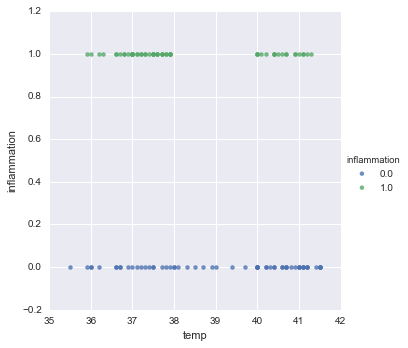

In [10]:
sns.lmplot(data=data_df, x='temp', hue='inflammation', y='inflammation', fit_reg=False) 

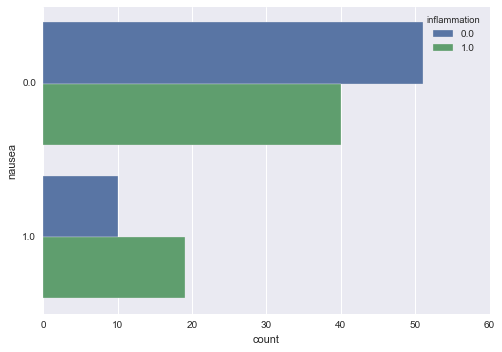

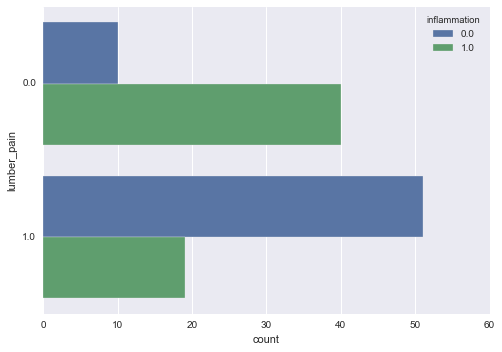

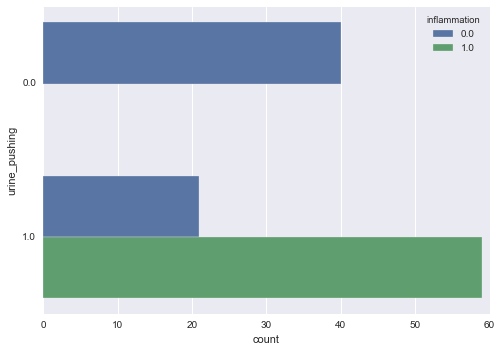

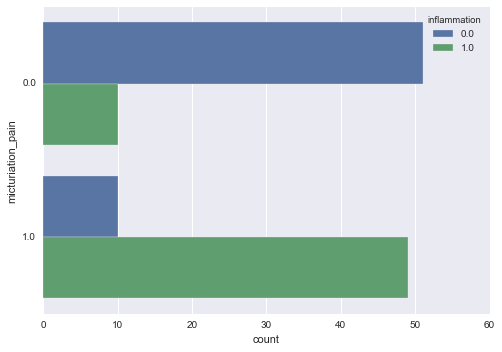

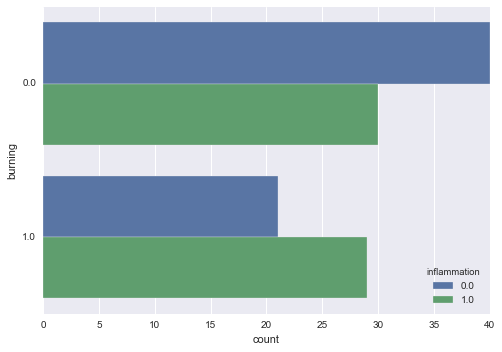

In [11]:
for fname in feature_df.columns[1:]:
    pylab.figure()
    sns.countplot(y=fname, hue="inflammation", data=data_df)

## The Logistic Regression Model for Inflammation

In [12]:
import statsmodels.formula.api as sm

In [13]:
inflammation_model = sm.logit(
    formula='inflammation ~ lumber_pain + urine_pushing + micturiation_pain',
    data=data_df
)
inflammation_result = inflammation_model.fit(method='lbfgs')
inflammation_result.summary()                

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           inflammation   No. Observations:                  120
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Aug 2017   Pseudo R-squ.:                   1.000
Time:                        22:55:06   Log-Likelihood:             -0.0018730
converged:                       True   LL-Null:                       -83.161
                                        LLR p-value:                 7.933e-36
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -10.5591     54.242     -0.195      0.846    -116.872      95.754
lumber_pain         -21.1604     70.291     -0.301      0.763    -158.928     116.607
urine_pushing        21.3780     63.605      0.336      0.737    -103.285     146.041
micturiation_pain    21.9279     71.917      0.305      0.760    -119.027     162.883
=====================================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

## Bivariate Analysis - Nephritis

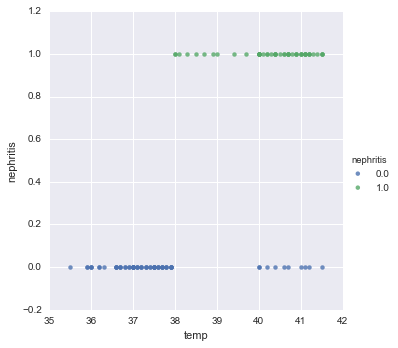

In [14]:
sns.lmplot(data=data_df, x='temp', hue='nephritis', y='nephritis', fit_reg=False) 

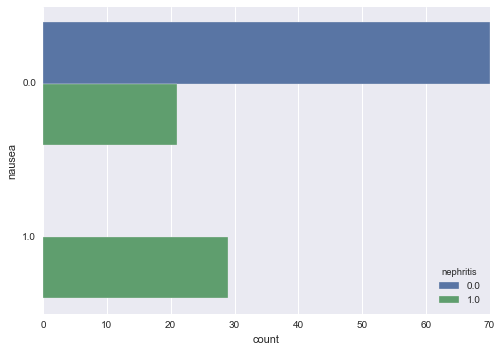

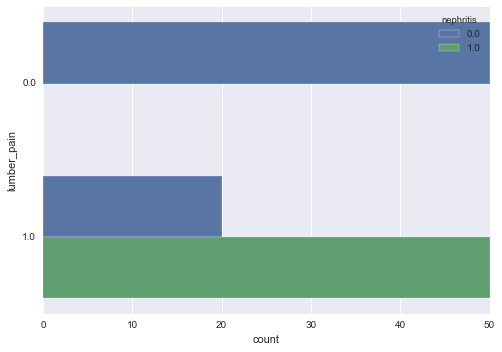

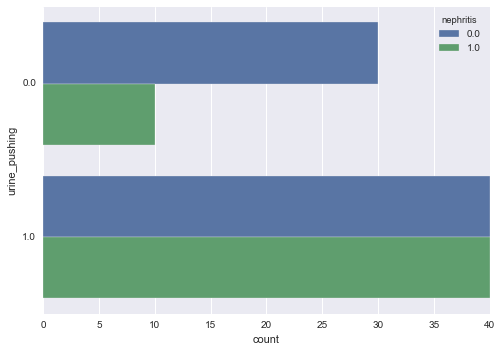

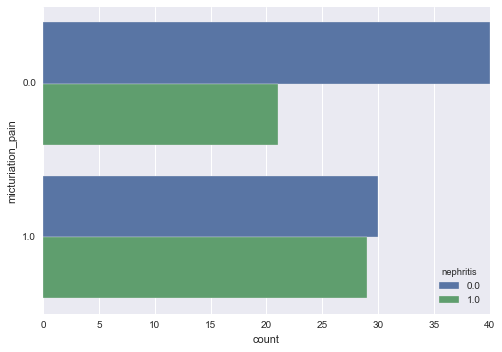

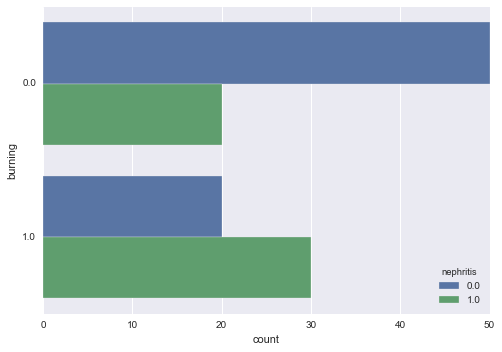

In [15]:
for fname in feature_df.columns[1:]:
    pylab.figure()
    sns.countplot(y=fname, hue="nephritis", data=data_df)

## The Logistic Regression Model for Nephritis

In [16]:
nephritis_model = sm.ols(
    formula='nephritis ~ temp + nausea + urine_pushing + lumber_pain + burning',
    data=data_df
)
nephritis_result = nephritis_model.fit()
nephritis_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nephritis   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     275.0
Date:                Mon, 07 Aug 2017   Prob (F-statistic):           7.31e-62
Time:                        22:55:08   Log-Likelihood:                 68.771
No. Observations:                 120   AIC:                            -125.5
Df Residuals:                     114   BIC:                            -108.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.6374      0.341    -13.608      0.000      -5.312      -3.962
temp              0.1144      0.009     12.777      0.000       0.097       0.132
nausea            0.2138      0.042      5.138      0.000       0.131       0.296
urine_pushing     0.3141      0.037      8.442      0.000       0.240       0.388
lumber_pain       0.5291      0.033     16.217      0.000       0.464       0.594
burning           0.1266      0.035      3.619      0.000       0.057       0.196
==============================================================================
Omnibus:                        7.119   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.197
Skew:                           0.600   Prob(JB):                       0.0274
Kurtosis:                       3.002   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""